### Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

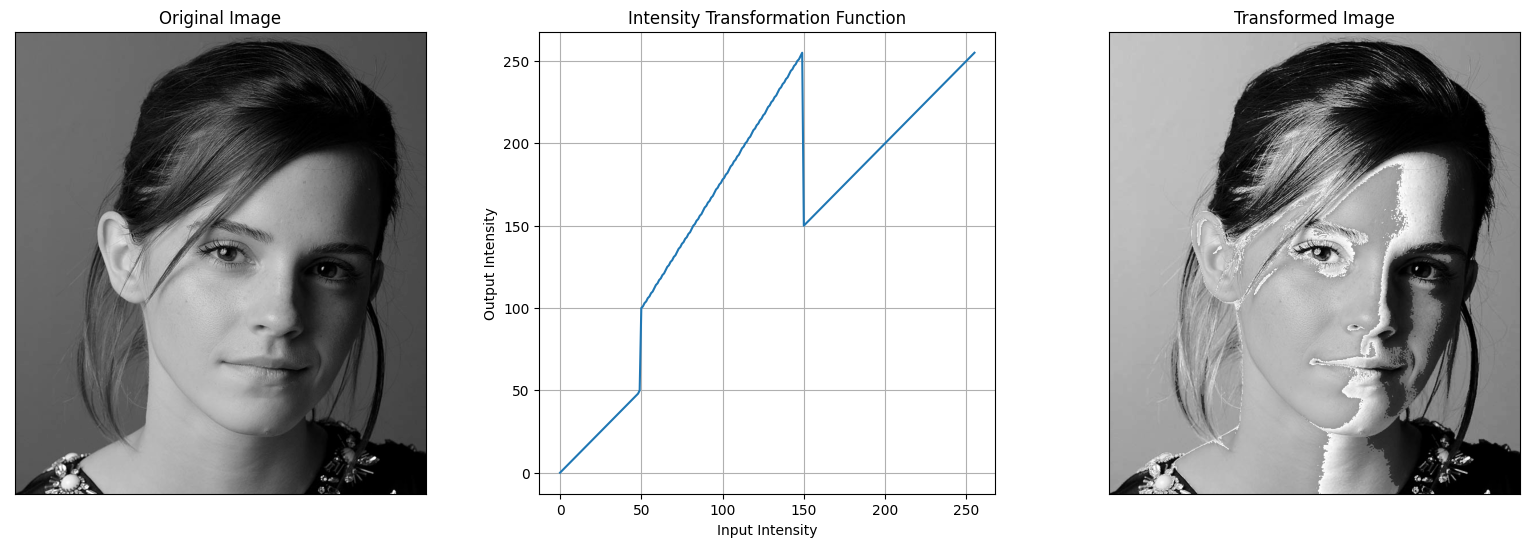

In [2]:
# Create intensity transformation function
intensity_transform = np.concatenate((
    np.linspace(0, 50, 50),       
    np.linspace(100, 255, 100),    
    np.linspace(150, 255, 106)     
), axis=0).astype(np.uint8)

# Read and transform image
source_image = cv.imread('a1images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
enhanced_image = cv.LUT(source_image, intensity_transform)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot original image
axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title("Original Image")

# Plot transformation function
axes[1].plot(intensity_transform)
axes[1].set_title("Intensity Transformation Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)

# Plot enhanced image
axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[2].set_title("Enhanced Image")

plt.show()

### Question 2

#### a)

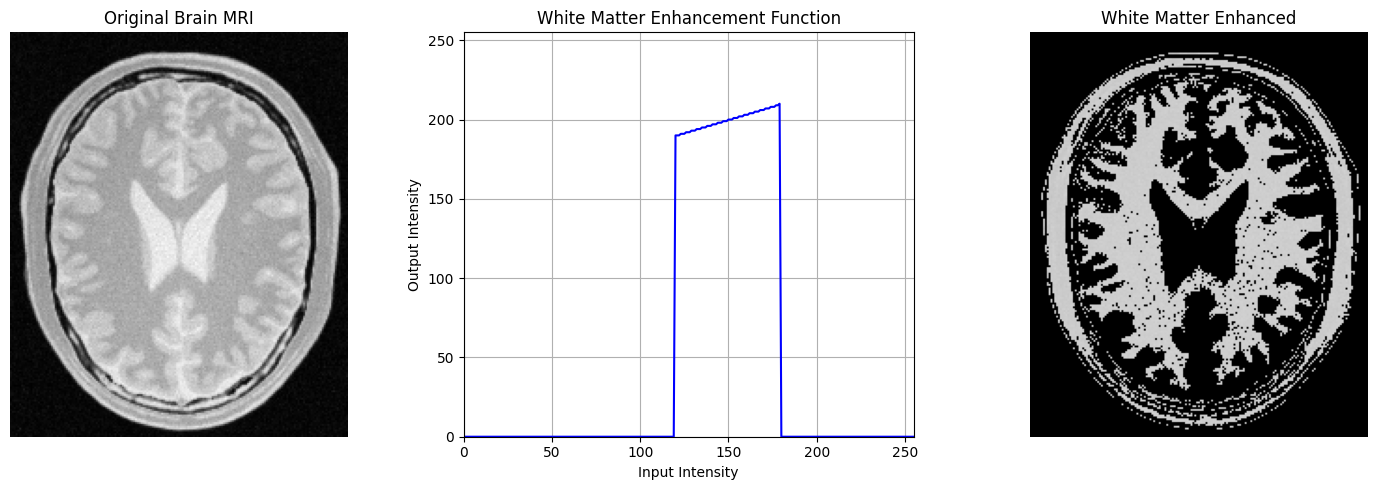

In [3]:
# Read input image
source_image = cv.imread('a1images/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Create white matter enhancement transform
white_matter_transform = np.concatenate((
    np.linspace(0, 0, 120),      
    np.linspace(190, 210, 60),   
    np.linspace(0, 0, 76)        
), axis=0).astype(np.uint8)

# Apply enhancement
enhanced_image = cv.LUT(source_image, white_matter_transform)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image
axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Brain MRI")
axes[0].set_axis_off()

# Plot transformation function
axes[1].plot(white_matter_transform, color='blue')
axes[1].set_title("White Matter Enhancement Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)
axes[1].set_xlim([0, 255])
axes[1].set_ylim([0, 255])

# Plot enhanced image
axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("White Matter Enhanced")
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

#### b)

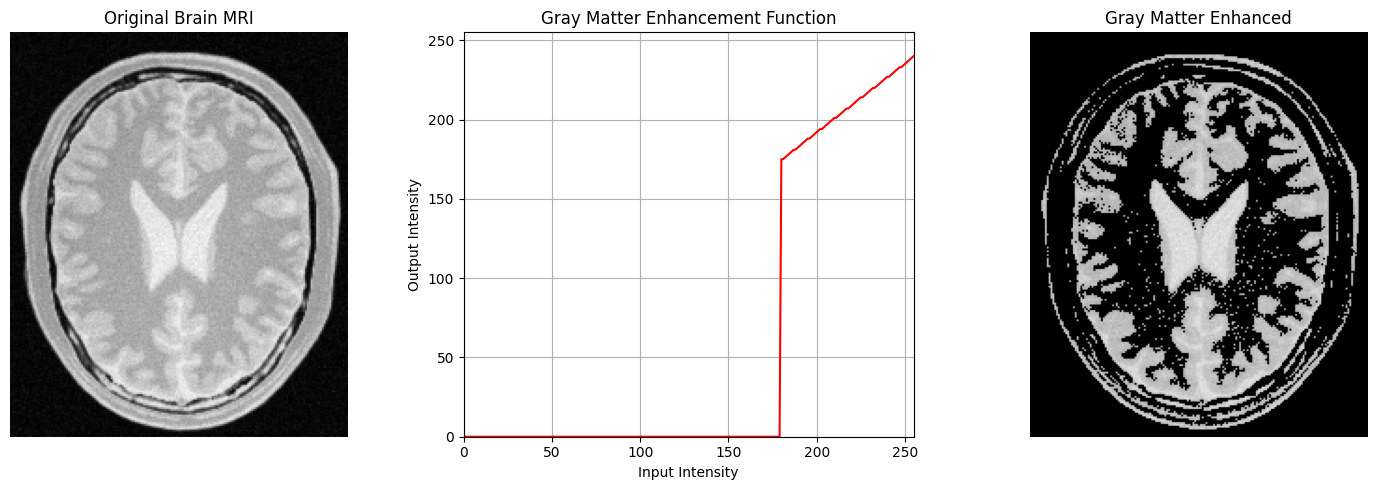

In [4]:
# Create gray matter enhancement transform
gray_matter_transform = np.concatenate((
    np.linspace(0, 0, 180),   
    np.linspace(175, 240, 76)   
), axis=0).astype(np.uint8)

# Apply enhancement
enhanced_image = cv.LUT(source_image, gray_matter_transform)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image
axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Brain MRI")
axes[0].set_axis_off()

# Plot transformation function
axes[1].plot(gray_matter_transform, color='red')
axes[1].set_title("Gray Matter Enhancement Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)
axes[1].set_xlim([0, 255])
axes[1].set_ylim([0, 255])

# Plot enhanced image
axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("Gray Matter Enhanced")
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

### Question 3


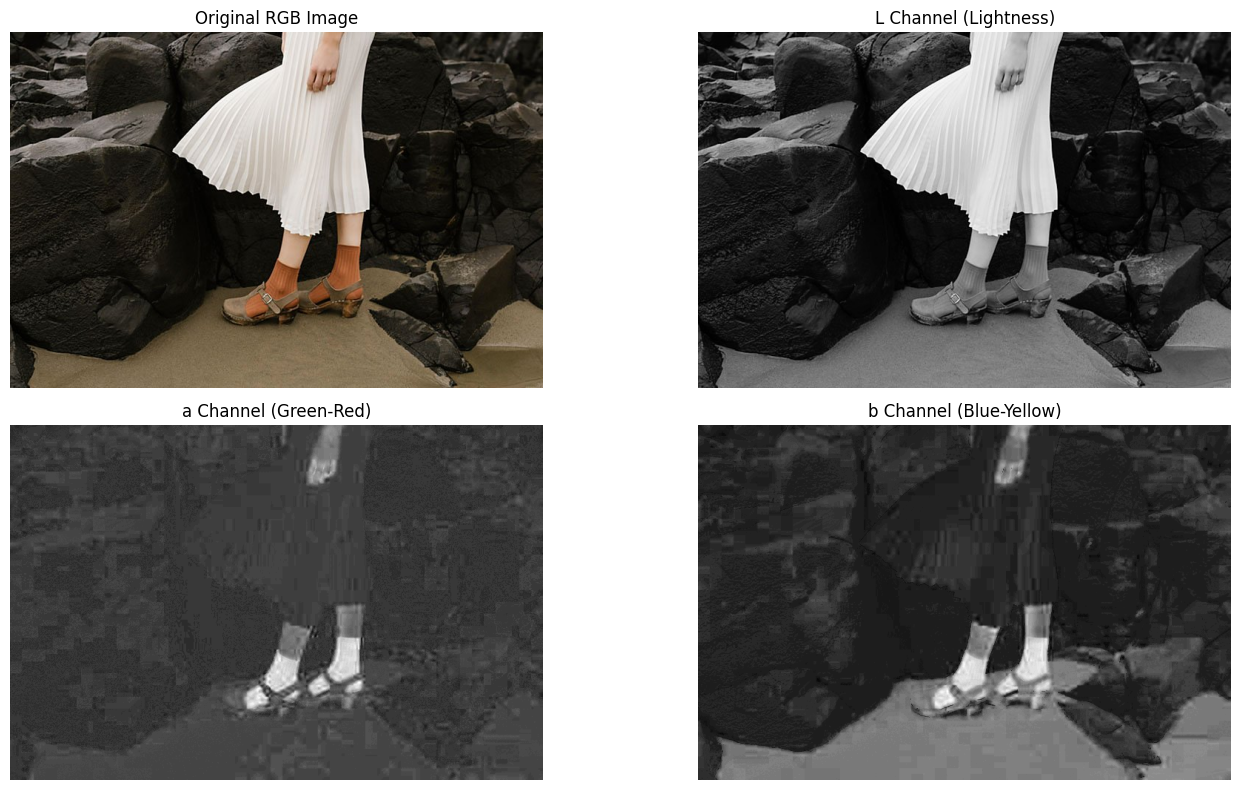

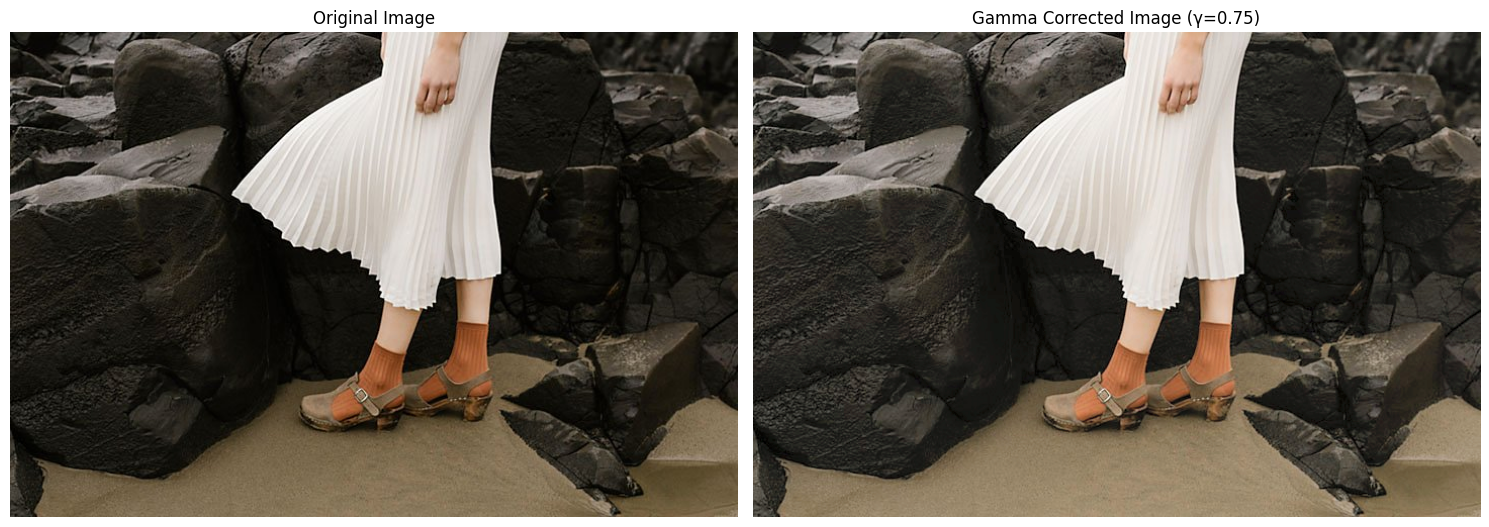

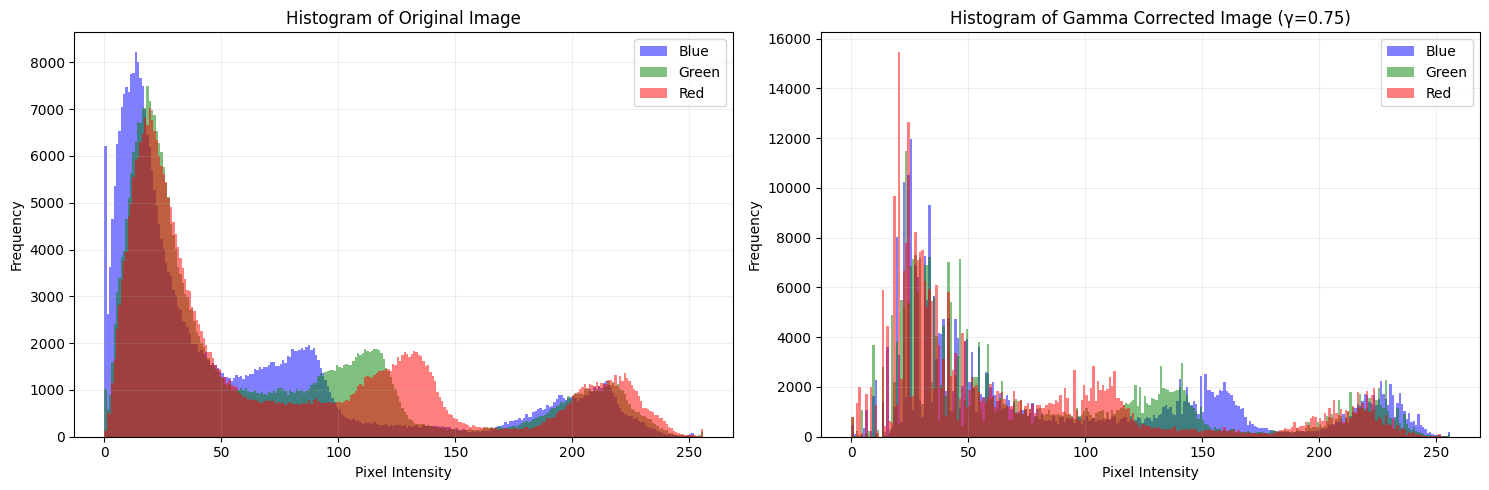

In [5]:
# Read and convert input image
source_image = cv.imread('a1images/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
rgb_image = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)
lab_image = cv.cvtColor(source_image, cv.COLOR_BGR2Lab)

# Split LAB channels
l_channel, a_channel, b_channel = cv.split(lab_image)

# Create figure for channel visualization
plt.figure(figsize=(15, 8))

# Plot original RGB image
plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original RGB Image')
plt.axis('off')

# Plot LAB channels
plt.subplot(222)
plt.imshow(l_channel, cmap='gray')
plt.title('L Channel (Lightness)')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel (Green-Red)')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap='gray')
plt.title('b Channel (Blue-Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Apply gamma correction
gamma_value = 0.75  
gamma_table = np.array([(i/255.0)**gamma_value * 255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply gamma correction to lightness channel
l_channel_enhanced = cv.LUT(l_channel, gamma_table)

# Merge channels and convert back to RGB
lab_enhanced = cv.merge([l_channel_enhanced, a_channel, b_channel])
rgb_enhanced = cv.cvtColor(lab_enhanced, cv.COLOR_Lab2RGB)

# Create figure for comparing original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original and enhanced images
axes[0].imshow(rgb_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(rgb_enhanced)
axes[1].set_title(f'Gamma Enhanced Image (γ={gamma_value})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Create figure for histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original image histogram
axes[0].hist(source_image[:,:,0].ravel(), bins=256, range=[0,256], color='b', alpha=0.5, label='Blue')
axes[0].hist(source_image[:,:,1].ravel(), bins=256, range=[0,256], color='g', alpha=0.5, label='Green')
axes[0].hist(source_image[:,:,2].ravel(), bins=256, range=[0,256], color='r', alpha=0.5, label='Red')
axes[0].set_title('Histogram of Original Image')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.2)

# Plot enhanced image histogram
axes[1].hist(rgb_enhanced[:,:,0].ravel(), bins=256, range=[0,256], color='b', alpha=0.5, label='Blue')
axes[1].hist(rgb_enhanced[:,:,1].ravel(), bins=256, range=[0,256], color='g', alpha=0.5, label='Green')
axes[1].hist(rgb_enhanced[:,:,2].ravel(), bins=256, range=[0,256], color='r', alpha=0.5, label='Red')
axes[1].set_title(f'Histogram of Gamma Enhanced Image (γ={gamma_value})')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

### Question 4

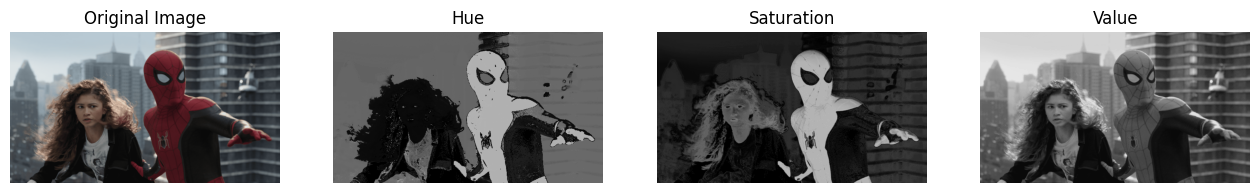

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

input_image = cv.imread('a1images/a1images/spider.png')
assert input_image is not None

#Convert the image to RBG since the img opens in BGR format
image_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

#Convert the image to HSV
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
hue_plane, saturation_plane, value_plane = cv.split(image_hsv)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image_rgb, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[1].imshow(hue_plane, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Hue')
axes[2].imshow(saturation_plane, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Saturation')
axes[3].imshow(value_plane, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Value')
for axis in axes:
    axis.axis('off')

plt.show()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

def vibrance_enhancement(intensity, strength, sigma=70):
    return int(min(intensity + (strength*128)*np.exp((-(intensity-128)**2)/(2*(sigma**2))), 255))  # Transformation function

def transform(strength):
    # This function will apply the desired transformation to selected planes of the image
    plt.clf()
    vibrance_table = np.array([vibrance_enhancement(x, strength) for x in np.arange(0, 256)]).astype('uint8')
    hue_channel, saturation_channel, value_channel = cv.split(image_hsv)    # Split the image into hue, saturation and value planes
    enhanced_saturation = cv.LUT(saturation_channel, vibrance_table)          # Apply vibrance correction to the saturation plane
    enhanced_hsv = cv.merge((hue_channel, enhanced_saturation, value_channel))   # Merge corrected plane with hue and value planes
    enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)
    #region
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(enhanced_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    #endregion

# Interactive Slider
vibrance_slider = interactive(transform, strength=(0, 1, 0.001))
slider_output = vibrance_slider.children[-1]
slider_output.layout.height = '400px'
vibrance_slider

interactive(children=(FloatSlider(value=0.0, description='strength', max=1.0, step=0.001), Output(layout=Layou…

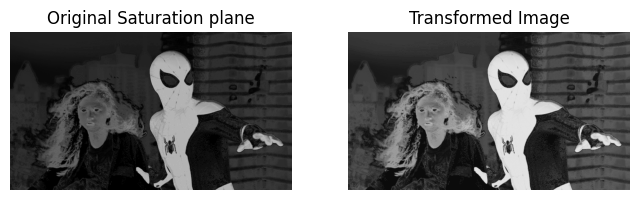

In [42]:
vibrance_strength = 0.48
vibrance_table = np.array([vibrance_enhancement(x, vibrance_strength) for x in np.arange(0, 256)]).astype('uint8')
hue_channel, saturation_channel, value_channel = cv.split(image_hsv)
enhanced_saturation = cv.LUT(saturation_channel, vibrance_table)

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(saturation_plane, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Saturation plane')
axes[1].imshow(enhanced_saturation, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed Image')
for axis in axes:
    axis.axis('off')
plt.show()

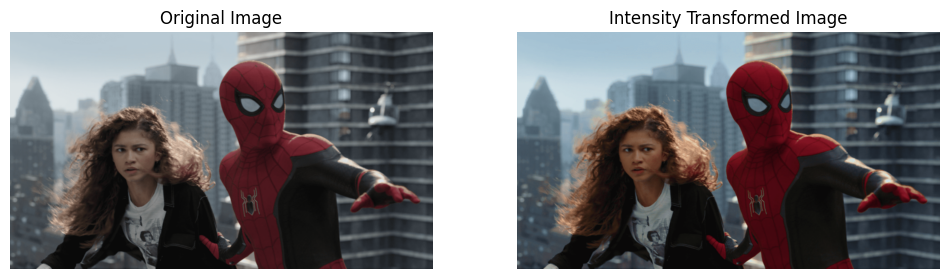

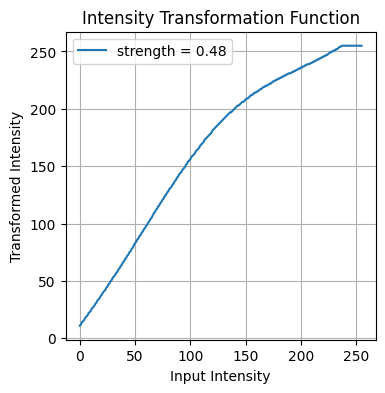

In [43]:
enhanced_hsv = cv.merge((hue_channel, enhanced_saturation, value_channel))   # Merge corrected plane with hue and value planes
enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(enhanced_rgb)
plt.title('Intensity Transformed Image')
plt.axis('off')
    
plt.show()
    
input_intensities = np.arange(0, 256)
plt.figure(figsize=(4,4))
plt.plot(input_intensities, vibrance_table, label=f'strength = {vibrance_strength}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid()
    
plt.show()